## This notebook is for new plot for generalizeability of the models on public datasets 

First we merge all covid-19 data into one and compare it with Healthy images.

#### For En_m_a model

In [170]:
import glob

all_data = glob.glob('../../../data/covid_patients/*EffnetB4_rnd_aug_agg*.txt')

all_data_f = open('../../../data/covid_patients/Pannels_EffnetB4_man_aug_agg__validation_predicted_newlabels.txt', 'a+')
 
### First, we merge all patients together
for ad in all_data:
    if 'Healthy' not in ad:
        with open(ad, 'r') as f2:
            all_data_f.write(f2.read())


#### For T_3_t model

In [171]:
import glob

all_data_T = glob.glob('../../../data/covid_patients/*T_3_t_agg__validation_predicted_newlabels.txt')

all_data_f_T = open('../../../data/covid_patients/Pannels_T_3_t_agg__validation_predicted_newlabels.txt', 'a+')
 
### First, we merge all patients together
for ad in all_data_T:
    if 'Healthy' not in ad:
        with open(ad, 'r') as f2:
            all_data_f_T.write(f2.read())


### Calculate tile scores to compare covid-19 with healthy slides
### Then we caclulate average score of slides to plot box and violin-plot

### En_m_a

In [172]:
import numpy as np
score_image_t = []
temp_score = []
###############################################Tile level score #########################
#########################################################################################
###################################################### Covid 19 #########################

with open('../../../data/covid_patients/Pannels_EffnetB4_man_aug_agg__validation_predicted_newlabels.txt', 'r') as f:
    for l in f:
        score_image_t = np.append(score_image_t,int(l.split()[1]))
            
print(score_image_t)
#########################################################################################
##################################################### Healthy ###########################
score_image_Healthy_t = []
with open('../../../data/covid_patients/Pannel_I_Healthy_croppedEffnetB4_man_aug_agg__validation_predicted_newlabels.txt', 'r') as f:
    for l in f:
        score_image_Healthy_t= np.append(score_image_Healthy_t,int(l.split()[1]))
        
print(score_image_Healthy_t)  ## this is for tiles



###############################################Slide level score ########################
#########################################################################################
###################################################### Covid 19 #########################
import numpy as np
score_image = []
temp_score = []
with open('../../../data/covid_patients/Pannels_EffnetB4_man_aug_agg__validation_predicted_newlabels.txt', 'r') as f:
    for l in f:
        name_img = l.split()[0]
        if '0_0' in name_img:
            if len(temp_score)!=0:
                score_image = np.append(score_image,np.mean(temp_score))
                temp_score=[]
        temp_score = np.append(temp_score,int(l.split()[1]))
        
#########################################################################################
##################################################### Healthy ###########################
import numpy as np
score_image_Healthy = []
temp_score = []
with open('../../../data/covid_patients/Pannel_I_Healthy_croppedEffnetB4_man_aug_agg__validation_predicted_newlabels.txt', 'r') as f:
    for l in f:
        name_img = l.split()[0]
        if '0_0' in name_img:
            if len(temp_score)!=0:
                score_image_Healthy = np.append(score_image_Healthy,np.mean(temp_score))
                temp_score=[]
        temp_score = np.append(temp_score,int(l.split()[1]))
        



[2. 2. 2. ... 0. 1. 0.]
[2. 1. 1. ... 0. 0. 0.]


### T_3_t

In [173]:
import numpy as np
score_image_T_t = []
temp_score = []

###############################################Tile level score #########################
#########################################################################################
###################################################### Covid 19 #########################
with open('../../../data/covid_patients/Pannels_T_3_t_agg__validation_predicted_newlabels.txt', 'r') as f:
    for l in f:
        score_image_T_t = np.append(score_image_T_t,int(l.split()[1]))
            
print(score_image_T_t)

#########################################################################################
###################################################### Healthy #########################
score_image_Healthy_T_t = []
with open('../../../data/covid_patients/Pannel_I_Healthy_croppedT_3_t_agg__validation_predicted_newlabels.txt', 'r') as f:
    for l in f:
        score_image_Healthy_T_t = np.append(score_image_Healthy_T_t,int(l.split()[1]))
               
print(score_image_Healthy_T_t)

###############################################Slide level score #########################
#########################################################################################
###################################################### Covid 19 #########################
import numpy as np
score_image_T = []
temp_score = []
with open('../../../data/covid_patients/Pannels_T_3_t_agg__validation_predicted_newlabels.txt', 'r') as f:
    for l in f:
        name_img = l.split()[0]
        if '0_0' in name_img:
            if len(temp_score)!=0:
                score_image_T = np.append(score_image_T,np.mean(temp_score))
                temp_score=[]
        temp_score = np.append(temp_score,int(l.split()[1]))
        

#########################################################################################
###################################################### Healthy #########################
import numpy as np
score_image_Healthy_T = []
temp_score = []
with open('../../../data/covid_patients/Pannel_I_Healthy_croppedT_3_t_agg__validation_predicted_newlabels.txt', 'r') as f:
    for l in f:
        name_img = l.split()[0]
        if '0_0' in name_img:
            if len(temp_score)!=0:
                score_image_Healthy_T = np.append(score_image_Healthy_T,np.mean(temp_score))
                temp_score=[]
        temp_score = np.append(temp_score,int(l.split()[1]))
        


[2. 2. 2. ... 1. 1. 0.]
[2. 1. 1. ... 0. 0. 0.]


#### Here I turned tile scores to image score.

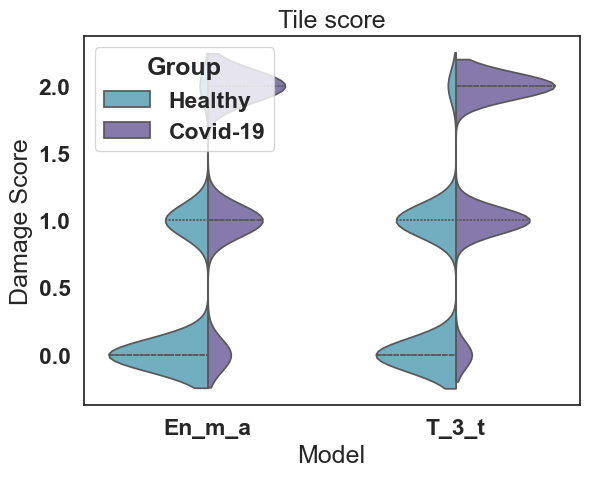

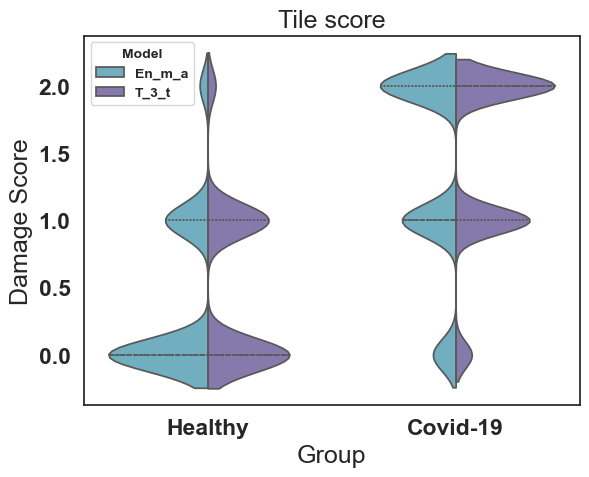

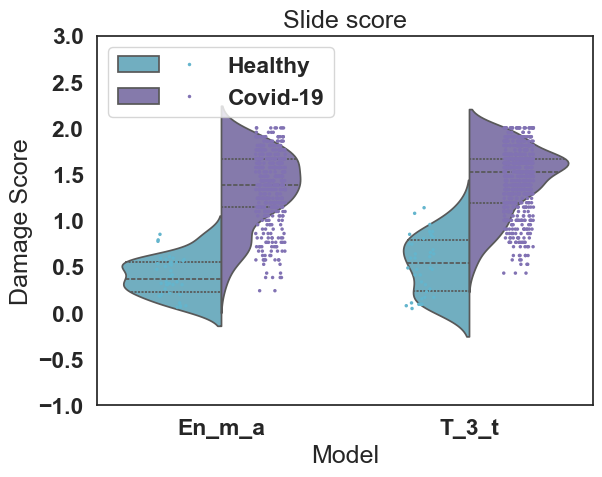

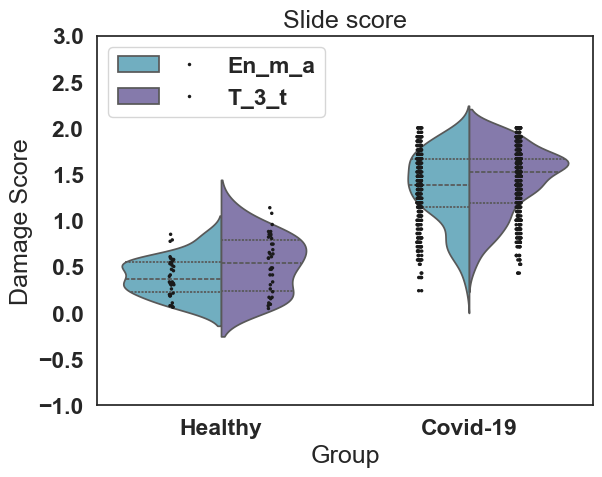

In [255]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


############################Tile level score ########################



df = pd.DataFrame(columns=['Damage Score','Group','Model'])

df['Damage Score']= np.concatenate([score_image_Healthy_t,score_image_t,score_image_Healthy_T_t,score_image_T_t],axis=0)
df['Group'] = ['Healthy']*len(score_image_Healthy_t)+['Covid-19']*len(score_image_t)+['Healthy']*len(score_image_Healthy_T_t)+['Covid-19']*len(score_image_T_t)
df['Model'] = ['En_m_a']*(len(score_image_Healthy_t)+len(score_image_t))+['T_3_t']*(len(score_image_Healthy_T_t)+len(score_image_T_t)) 
df

plt.figure()



plt.title('Tile score')
sns.violinplot(data=df, x="Model", y="Damage Score", hue="Group",
               split=True, inner="quart", fill=True,
               palette={"Healthy": "c", "Covid-19": "m"})
plt.figure()
plt.title('Tile score')
sns.violinplot(data=df, x="Group", y="Damage Score", hue="Model",
               split=True, inner="quart", fill=True,
               palette={"En_m_a": "c", "T_3_t": "m"})
plt.legend(title='Model', fontsize='10', title_fontsize='10')
#################################Image level score ###################
df = pd.DataFrame(columns=['Damage Score','Group','Model'])

df['Damage Score']= np.concatenate([score_image_Healthy,score_image,score_image_Healthy_T,score_image_T],axis=0)
df['Group'] = ['Healthy']*len(score_image_Healthy)+['Covid-19']*len(score_image)+['Healthy']*len(score_image_Healthy_T)+['Covid-19']*len(score_image_T)
df['Model'] = ['En_m_a']*(len(score_image_Healthy)+len(score_image))+['T_3_t']*(len(score_image_Healthy_T)+len(score_image_T)) 
df
#######################################################################
plt.figure()
plt.title('Slide score')
ax = sns.violinplot(data=df, x="Model", y="Damage Score", hue="Group",
               split=True, inner="quart", fill=True,
               palette={"Healthy": "c", "Covid-19": "m"})
ax = sns.stripplot(data=df, x="Model", y="Damage Score",
              hue="Group",jitter=0.12,palette={"Healthy": "c", "Covid-19": "m"},marker='.',dodge=True, ax=ax)
plt.ylim([-1,3])

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=[(handles[0], handles[2]), (handles[1], handles[3])],
          labels=['Healthy', 'Covid-19'],
          loc='upper left', handlelength=4,
          handler_map={tuple: HandlerTuple(ndivide=None)})

###########################################################################

plt.figure()
plt.title('Slide score')
ax = sns.violinplot(data=df, x="Group", y="Damage Score", hue="Model",
               split=True, inner="quart", fill=True,
               palette={"En_m_a": "c", "T_3_t": "m"})
ax = sns.stripplot(data=df,x="Group", y="Damage Score", hue="Model",jitter=0.02,palette={"En_m_a": "k", "T_3_t": "k"},marker='.',dodge=True, ax=ax)
plt.ylim([-1,3])

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=[(handles[0], handles[2]), (handles[1], handles[3])],
          labels=['En_m_a', 'T_3_t'],
          loc='upper left', handlelength=4,
          handler_map={tuple: HandlerTuple(ndivide=None)})

#### Plot params
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['font.family']    = "sans-serif"
plt.rcParams['font.size']      =22
sns.set(font_scale=1.5)
sns.set_style("white")


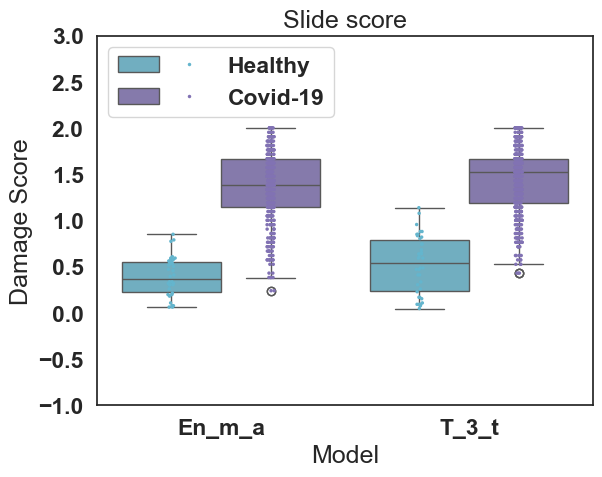

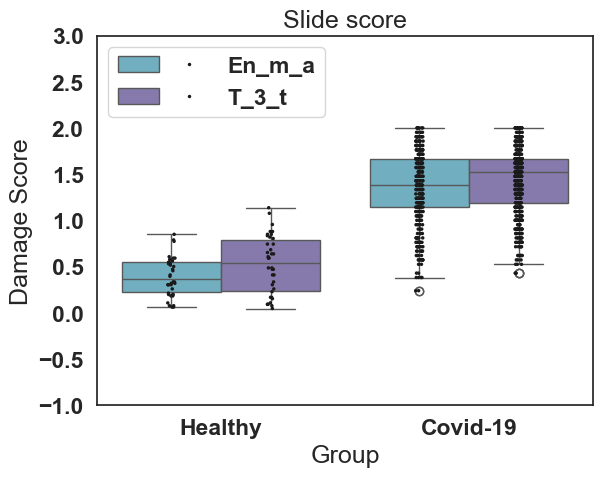

In [258]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.legend_handler import HandlerTuple

df = pd.DataFrame(columns=['Damage Score','Group','Model'])

df['Damage Score']= np.concatenate([score_image_Healthy,score_image,score_image_Healthy_T,score_image_T],axis=0)
df['Group'] = ['Healthy']*len(score_image_Healthy)+['Covid-19']*len(score_image)+['Healthy']*len(score_image_Healthy_T)+['Covid-19']*len(score_image_T)
df['Model'] = ['En_m_a']*(len(score_image_Healthy)+len(score_image))+['T_3_t']*(len(score_image_Healthy_T)+len(score_image_T)) 
df

plt.figure()
plt.title('Slide score')
ax = sns.boxplot(data=df, x="Model", y="Damage Score", hue="Group",
                fill=True,
               palette={"Healthy": "c", "Covid-19": "m"},)
ax = sns.stripplot(data=df, x="Model", y="Damage Score",
              hue="Group",jitter=0.03,palette={"Healthy": "c", "Covid-19": "m"},marker='.',dodge=True, ax=ax)
plt.ylim([-1,3])

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=[(handles[0], handles[2]), (handles[1], handles[3])],
          labels=['Healthy', 'Covid-19'],
          loc='upper left', handlelength=4,
          handler_map={tuple: HandlerTuple(ndivide=None)})


######################################################################
plt.figure()
plt.title('Slide score')
ax = sns.boxplot(data=df, x="Group", y="Damage Score", hue="Model",
               fill=True,
               palette={"En_m_a": "c", "T_3_t": "m"})
ax = sns.stripplot(data=df,x="Group", y="Damage Score", hue="Model",jitter=0.03,palette={"En_m_a": "k", "T_3_t": "k"},marker='.',dodge=True, ax=ax)
plt.ylim([-1,3])

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=[(handles[0], handles[2]), (handles[1], handles[3])],
          labels=['En_m_a', 'T_3_t'],
          loc='upper left', handlelength=4,
          handler_map={tuple: HandlerTuple(ndivide=None)})

sns.set(font_scale=1.5)
sns.set_style("white")